# Lead Score Case Study: 
### The X education company requires a model that gives better hot leads which will improve the conversion rate 

Steps for Logistic Regression:
- Data Inspection
- Data Cleaning
- Data Preparation
- Data Visualisation
- Dummy Variable Creation
- Split the data into the Train and Test set
- Scaling
- Feature selection by RFE
- Logistic Regression Modeling
- Prediction on Test Set
- Assigning Lead score to the dataset

In [1]:
# Importing all the libraries and packages...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   # Importing matplotlib and seaborn
import seaborn as sns
%matplotlib inline
import warnings                   # Suppressing Warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing variaous libraries from statsmodel and sklearn
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [3]:
# Importing Leads dataset
Leads_df = pd.read_csv("Leads.csv")

### Data Inspection...

In [4]:
# Shape of the dataset
Leads_df.shape

(9240, 37)

In [5]:
# Information about no of columns and datatypes of those column
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# The first 5 rows of the dataset...
pd.set_option('display.max_columns', 100)
Leads_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [7]:
Leads_df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

### Data Cleaning...

#### Dropping duplicate rows...

In [8]:
# removing duplicate rows
Leads_df.drop_duplicates(subset='Lead Number')
Leads_df.shape

(9240, 37)

No duplicate values in the dataset

#### Dropping columns which are not necessary for prediction....

In [9]:
#Remove columns which has only one unique value
Leads_df= Leads_df.loc[:,Leads_df.nunique()!=1]
Leads_df.shape

(9240, 32)

In [10]:
# List of all columns in the dataset....
Leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [11]:
# Dropping columns Prospect ID and Lead Number as they are not necessary for analysis...
Leads_df.drop(['Prospect ID'],axis=1,inplace=True)
Leads_df.shape

(9240, 31)

- There are 9240 rows
- 30 columns in the dataset

#### Checking for missing values...

In [12]:
# The percentage of null values present in the each column
round(100*(Leads_df.isnull().sum()/Leads_df.shape[0]),2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

 Columns with missing value percentages:
 - Lead Quality                                     51.59
 - Asymmetrique Activity Index                      45.65
 - Asymmetrique Profile Index                       45.65
 - Asymmetrique Activity Score                      45.65
 - Asymmetrique Profile Score                       45.65
 - Tags                                             36.29
 - What matters most to you in choosing a course    29.32
 - Lead Profile                                     29.32
 - What is your current occupation                  29.11
 - Country                                          26.63
 - How did you hear about X Education               23.89
 - Specialization                                   15.56
 - City                                             15.37
 - Page Views Per Visit                              1.48
 - TotalVisits                                       1.48
 - Last Activity                                     1.11
 - Lead Source                                       0.39

Lets treat these columns one by one.

In [13]:
# Dropping columns which has more than 40% of null values...
Leads_df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)
Leads_df.shape

(9240, 26)

In [14]:
# Defining column function to describe the column and plot the graph for that column...
def column(x):
    print(Leads_df[x].describe())
    ax=sns.countplot(Leads_df[x])
    plt.setp(ax.get_xticklabels(), rotation=90)
    

In [15]:
# Defination for imputing null values...
def null_values(column,value):
    Leads_df[column]=Leads_df[column].replace(np.nan,value)


count       6531
unique         6
top       Select
freq        4146
Name: Lead Profile, dtype: object


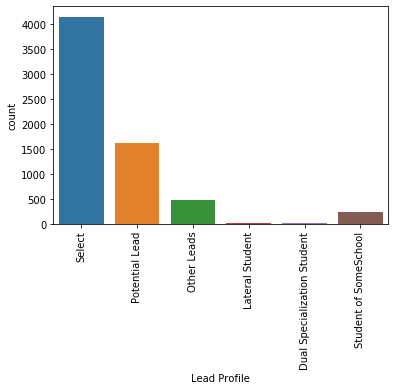

In [16]:
# Lead Profile: A lead level assigned to each customer based on their profile.
column('Lead Profile')

count               9240
unique                 2
top       Potential Lead
freq                8468
Name: Lead Profile, dtype: object


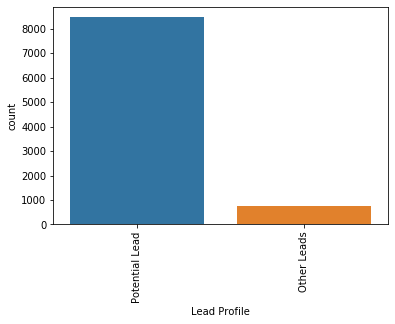

In [17]:
# Replacing the values of 'Select' category to 'Potential Lead'
Leads_df['Lead Profile'] = Leads_df['Lead Profile'].replace('Select','Potential Lead')

# Replacing column Lead Profile null values to 'Potential Lead' category...
null_values('Lead Profile','Potential Lead')

# Since Categories 'Lateral Student','Dual Specialization Student' and 'Student of SomeSchool' are less in numbers 
# they can be changed into' Other Leads' category
Leads_df['Lead Profile']=Leads_df['Lead Profile'].replace(['Lateral Student','Dual Specialization Student','Student of SomeSchool'],'Other Leads')

# Checking the column again after imputing null values..
column('Lead Profile')

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object


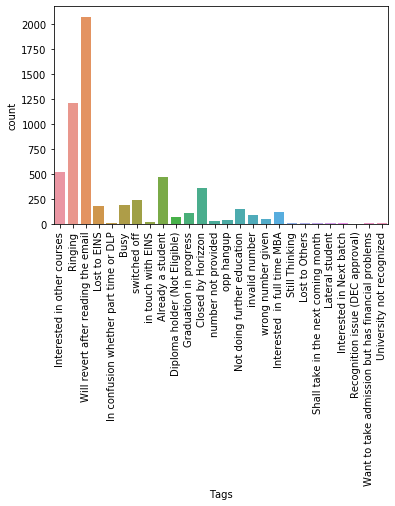

In [18]:
# Tags: Tags assigned to customers indicating the current status of the lead.
column('Tags')

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object


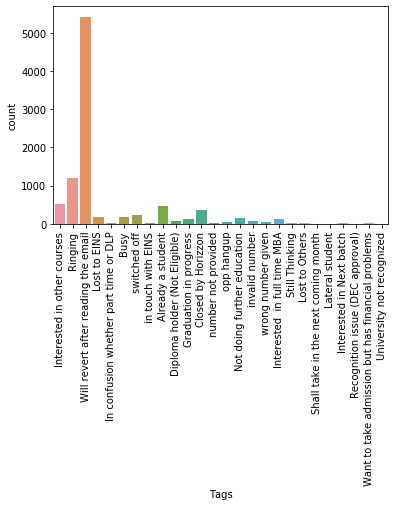

In [19]:
# Replacing column 'Tags' null values to 'Will revert after reading the email' category...
null_values('Tags','Will revert after reading the email')
# Checking the column again after imputing null values..
column('Tags')

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object


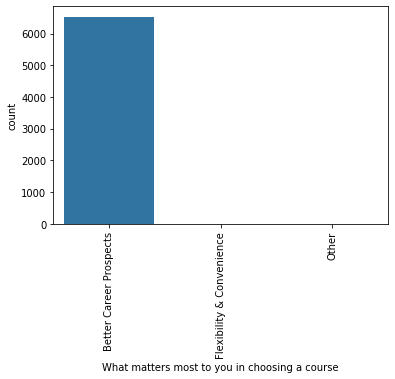

In [20]:
# What matters most to you in choosing a course: An option selected by the customer indicating what is their main motto 
#  behind doing this course.
column('What matters most to you in choosing a course')

In [21]:
# Checking the value counts of the column..
Leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

count                        9240
unique                          2
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object


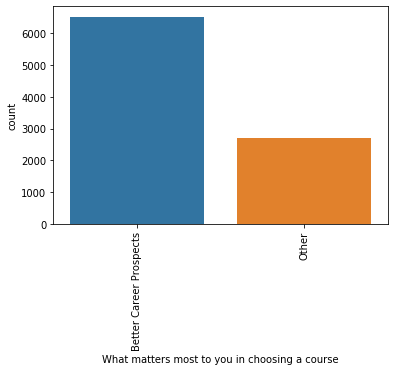

In [22]:
# Replacing column 'What matters most to you in choosing a course' null values with ' Other'...
null_values('What matters most to you in choosing a course','Other')

# Since 'Flexibiity & Convenience' Values are less combining them with 'Other'
Leads_df['What matters most to you in choosing a course']=Leads_df['What matters most to you in choosing a course'].replace('Flexibility & Convenience','Other')

# Checking the column again after imputing null values..
column('What matters most to you in choosing a course')

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


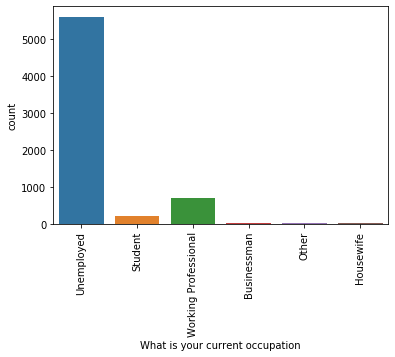

In [23]:
# What is your current occupation: Indicates whether the customer is a student, umemployed or employed.
column('What is your current occupation')

count           9240
unique             4
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object


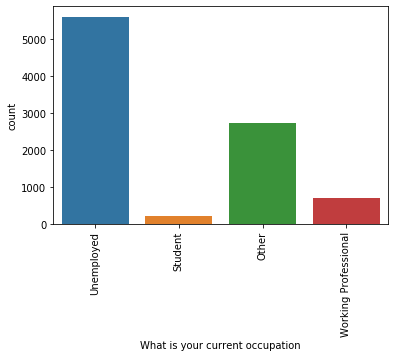

In [24]:
# Replacing column 'What is your current occupation' null values with 'Other'...
null_values('What is your current occupation','Other')

# Replacing 'Businessman','Housewife' to 'Other' category..
Leads_df['What is your current occupation']=Leads_df['What is your current occupation'].replace(['Businessman','Housewife'],'Other')

# Checking the column again after imputing null values..
column('What is your current occupation')

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object


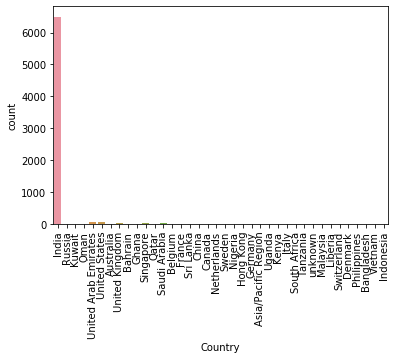

In [25]:
# Country: The country of the customer
column('Country')

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object


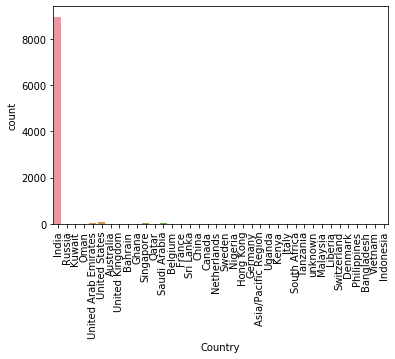

In [26]:
# Replacing column 'Country' null values with 'India...
null_values('Country','India')

# Checking the column again after imputing null values..
column('Country')

count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object


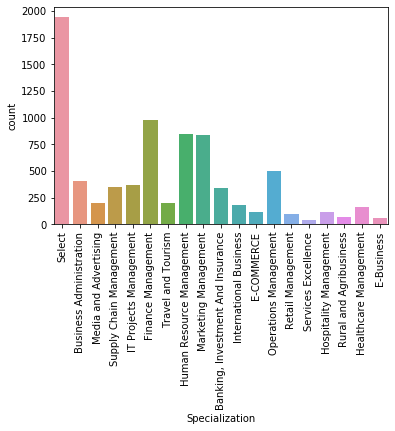

In [27]:
# Specialization: The industry domain in which the customer worked before. Includes the level 'Select Specialization' 
#                 which means the customer had not selected this option while filling the form.
column('Specialization')

count                   9240
unique                    19
top       Finance Management
freq                    2414
Name: Specialization, dtype: object


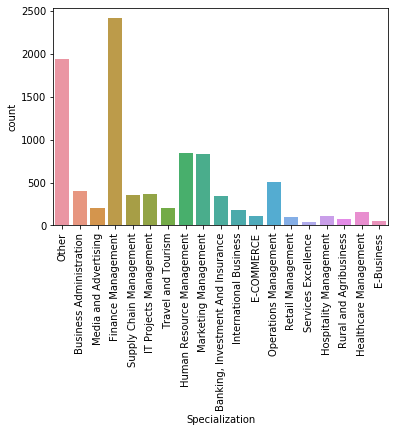

In [28]:
# Replacing column 'Specialization' null values with 'Finance Management'...
null_values('Specialization','Finance Management')
# Replacing 'Select' Values to 'Other'
Leads_df['Specialization']=Leads_df['Specialization'].replace('Select','Other')
# Checking the column again after imputing null values..
column('Specialization')

count       7820
unique         7
top       Mumbai
freq        3222
Name: City, dtype: object


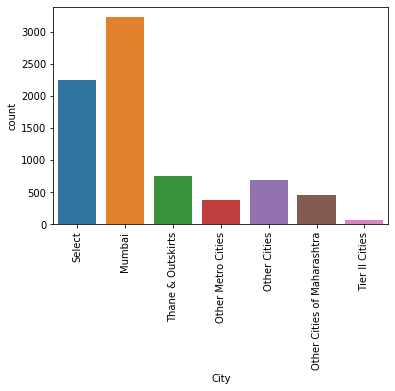

In [29]:
# City: The city of the customer.
column('City')

count       9240
unique         6
top       Mumbai
freq        6891
Name: City, dtype: object


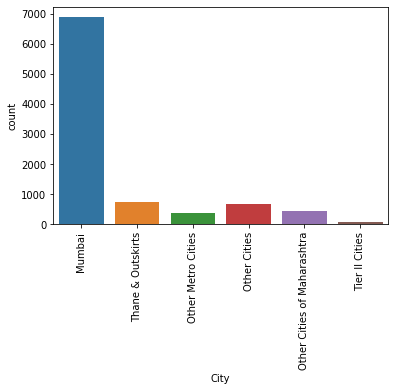

In [30]:
# Replacing column 'City' null values with 'Mumbai'...
null_values('City','Mumbai')

# Replacing 'Select' values to 'Mumbai'
Leads_df['City']= Leads_df['City'].replace('Select','Mumbai')
# Checking the column again after imputing null values..
column('City')

count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object


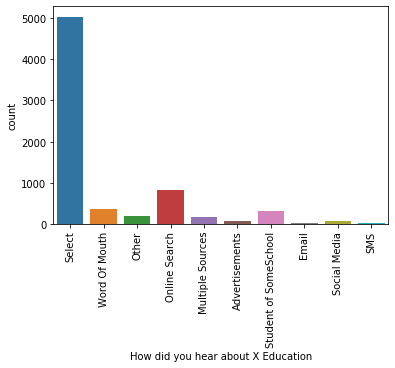

In [31]:
# How did you hear about X Education: The source from which the customer heard about X Education.
column('How did you hear about X Education')

count              9240
unique                9
top       Online Search
freq               8058
Name: How did you hear about X Education, dtype: object


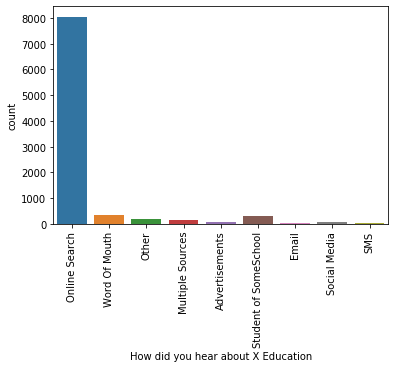

In [32]:
# Replacing column 'How did you hear about X Education' null values with 'Online Search'...
null_values('How did you hear about X Education','Online Search')

# Replacing 'select' values to 'Online Search'
Leads_df['How did you hear about X Education']= Leads_df['How did you hear about X Education'].replace('Select','Online Search')

# Checking the column again after imputing null values..
column('How did you hear about X Education')

In [33]:
# Since there is below 2% of data has missing values they can be removed from the dataset
Leads_df.dropna(inplace = True)
Leads_df.shape

(9074, 26)

In [34]:
# Checking the percentage null values of columns after imputing..
round(100*(Leads_df.isnull().sum()/len(Leads_df.index)), 2)

Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

Missing values are not present in the dataset now

In [35]:
# Categorising into numerical and categorical values...
cat_col=[]
num_col=[]
for i in Leads_df.columns:
    if Leads_df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)
print(cat_col)
print(num_col)
print(len(cat_col))

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
['Lead Number', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
21


### Outlier Analysis

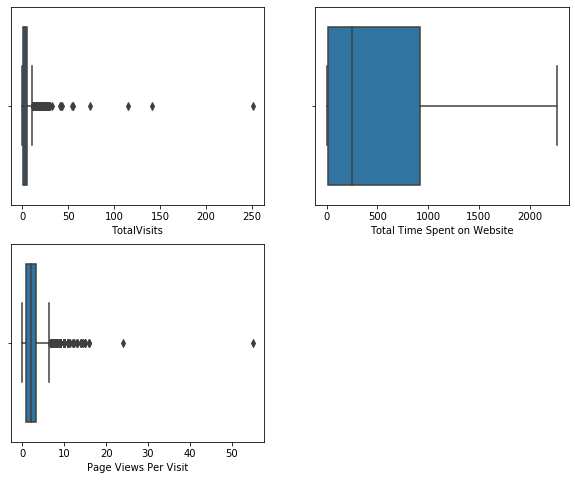

In [36]:
# Boxplots for the Numerical data

num_col=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(10,8))
for i,j in enumerate(num_col):
    plt.subplot(2,2,i+1)
    sns.boxplot(Leads_df[j])
plt.show() 

In [37]:
# IQR method for the numerical columns to remove outliers for total visits and page views per visit..
cols=['TotalVisits', 'Total Time Spent on Website']
for x in cols:
    Q1=Leads_df[x].quantile(0.05)
    Q3=Leads_df[x].quantile(0.95)
    Leads_df=Leads_df[((Leads_df[x]>=Q1)&(Leads_df[x]<=Q3))]
Leads_df.shape

(8287, 26)

#### Univariate Analysis...

In [38]:
# Percentage of Conversion rate
(sum(Leads_df['Converted'])/len(Leads_df['Converted'].index))*100

35.923735972004344

 - The conversion rate is 35.9%

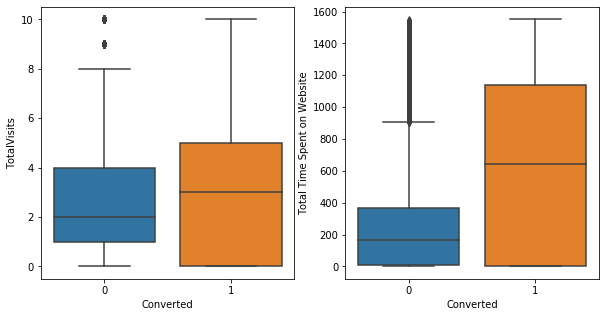

In [39]:
plt.figure(figsize=(10,5))
for i,j in enumerate(cols):
    plt.subplot(1,2,i+1)
    sns.boxplot(y=j,x='Converted',data=Leads_df)
plt.show() 

- The more the number of visits on the website the more the conversion rate
- More the time spent on website the more the conversion rate

In [40]:
# Checking for the correlation of the Leads dataset
corrmat = Leads_df[num_col].corr()
corrmat.shape

(3, 3)

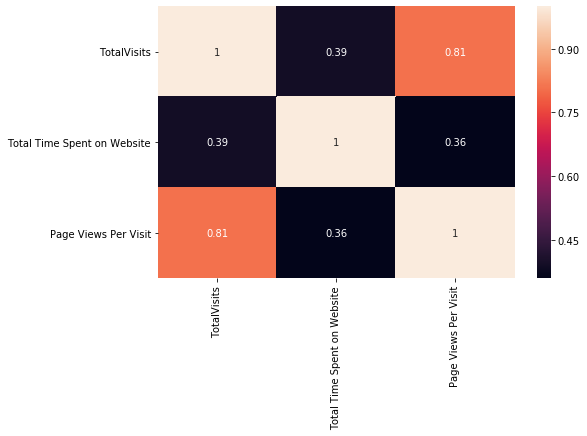

In [41]:
# Heatmap to understand the variables correlation...
plt.figure(figsize=[8,5])
sns.heatmap(corrmat, annot=True)

There is 0.81 correlation between variables Total visits and Page Views per Visit

In [42]:
# Value counts of the categorical columns in the dataset
for i in cat_col :
    print(i,':',Leads_df[i].value_counts())

Lead Origin : Landing Page Submission    4319
API                        3369
Lead Add Form               569
Lead Import                  30
Name: Lead Origin, dtype: int64
Lead Source : Google               2585
Direct Traffic       2271
Olark Chat           1732
Organic Search        976
Reference             434
Welingak Website      128
Referral Sites        104
Facebook               31
bing                    6
google                  5
Click2call              3
Social Media            2
Live Chat               2
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
Press_Release           1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64
Do Not Email : No     7632
Yes     655
Name: Do Not Email, dtype: int64
Do Not Call : No     8285
Yes       2
Name: Do Not Call, dtype: int64
Last Activity : Email Opened                    3148
SMS Sent                        2465
Ol

Lead Origin : 
- Landing Page Submission    4319
- API                        3369
- Lead Add Form               569
- Lead Import                  30

In [43]:
# 'Lead Import' and  'Lead Add Form' can be clubbed to form another category 'Other'
Leads_df['Lead Origin'] = Leads_df['Lead Origin'].replace(['Lead Add Form','Lead Import'],'Other')

Lead Source : 
- Welingak Website      128
- Referral Sites        104
- Facebook               31
- bing                    6
- google                  5
- Click2call              3
- Live Chat               2
- Social Media            2
- NC_EDM                  1
- welearnblog_Home        1
- Pay per Click Ads       1
- WeLearn                 1
- youtubechannel          1
- blog                    1
- testone                 1
- Press_Release           1

In [44]:
# Since there are very less values like 1 for each category they all can be clubbed in to a category 'Other'
Leads_df['Lead Source']=Leads_df['Lead Source'].replace(['Referral Sites','Welingak Website','Facebook','bing','Click2call','Live Chat','Social Media','NC_EDM','welearnblog_Home','Pay per Click Ads','WeLearn','youtubechannel','blog','testone','Press_Release'],'Other')

# 'google' can be replaced with 'Google'
Leads_df['Lead Source']=Leads_df['Lead Source'].replace('google','Google')

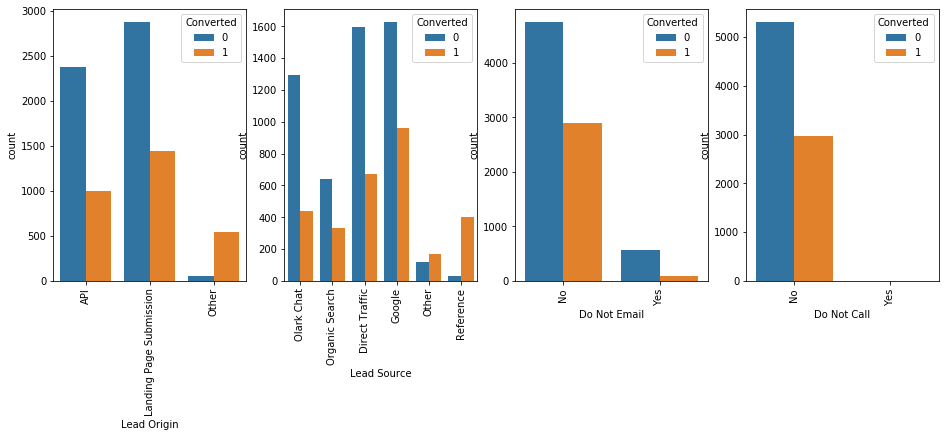

In [45]:
a=cat_col[0:4] 
plt.figure(figsize=(20,5))
for i,j in enumerate(a):
    plt.subplot(1,5,i+1)
    ax=sns.countplot(x =j, hue = "Converted", data = Leads_df)
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()    
   

- Landing Page Submission category has more no of hot leads when compared to other categories
- For category ' Google' has more no of hot leads
- Do Not Email : No category has more no of hot leads
- Do Not Call : No category has more no of leads.

Last Activity :
 - Unreachable                       82
 - Unsubscribed                      54
 - Had a Phone Conversation          18
 - Approached upfront                 5
 - View in browser link Clicked       5
 - Email Received                     2
 - Resubscribed to emails             1
 - Email Marked Spam                  1
 - Visited Booth in Tradeshow         1

In [46]:
# Since there are very less values like 1 for each category they all can be clubbed in to a category 'Other'
Leads_df['Last Activity']=Leads_df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Resubscribed to emails','Email Marked Spam','Visited Booth in Tradeshow'],'Other')


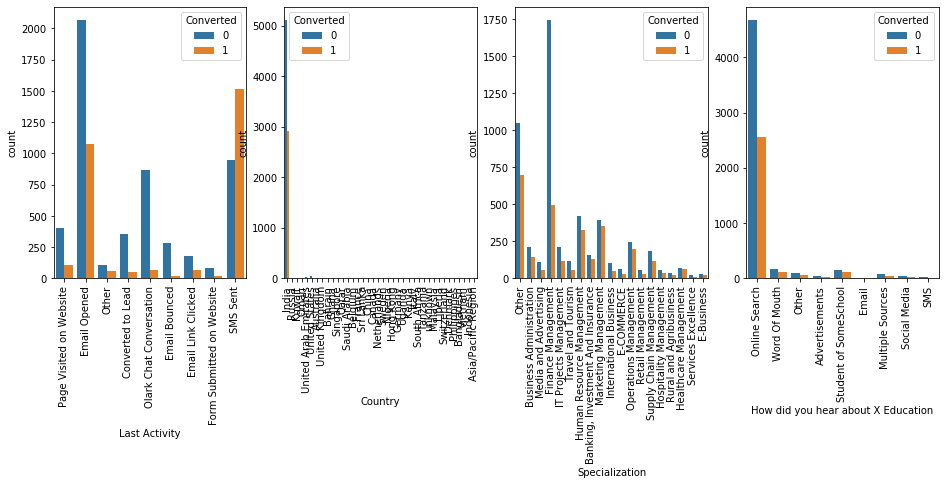

In [47]:
a=cat_col[4:8] 
plt.figure(figsize=(20,5))
for i,j in enumerate(a):
    plt.subplot(1,5,i+1)
    ax=sns.countplot(x =j, hue = "Converted", data = Leads_df)
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()    
   

- Last Activity: SMS sent category has more no of hot leads
- Country: This is not giving much information and this can be dropped
- Specialization: The hot leads are found more from the Other category
- How did you Hear about X education: The number of hot leads are found from online search

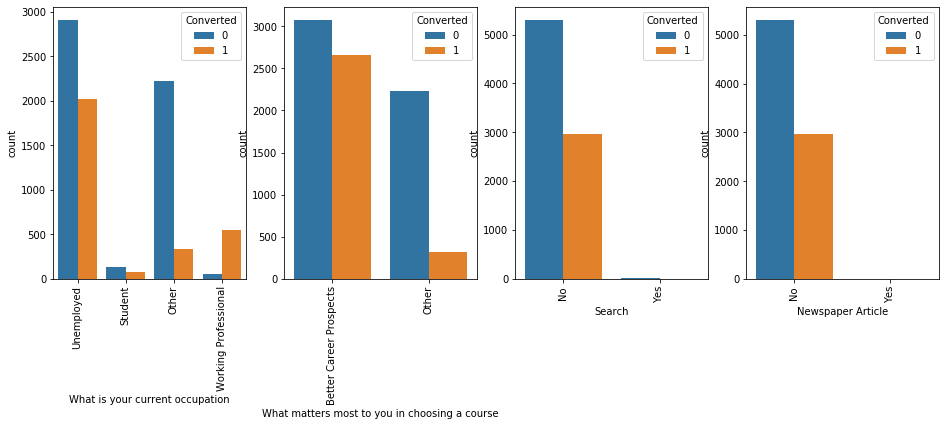

In [48]:
a=cat_col[8:12] 
plt.figure(figsize=(20,5))
for i,j in enumerate(a):
    plt.subplot(1,5,i+1)
    ax=sns.countplot(x =j, hue = "Converted", data = Leads_df)
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()    
   

 - What is your current occupation: Unemployed category has more no of hot leads
 - What matters most to you in choosing a course: Better career prospects has more no of hot leads
 - Search and Newspaper Article not giving much information

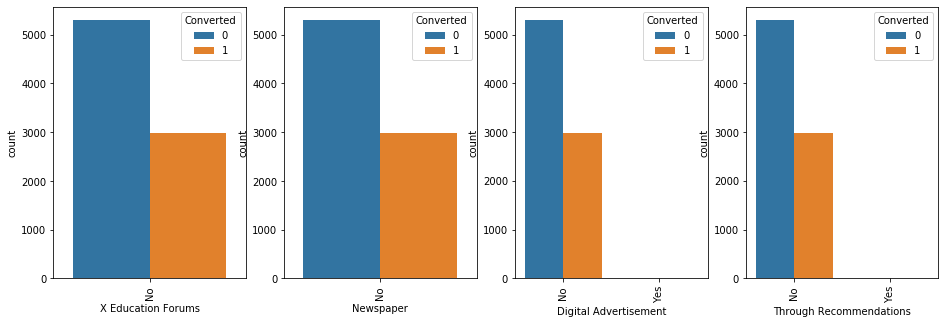

In [49]:
a=cat_col[12:16] 
plt.figure(figsize=(20,5))
for i,j in enumerate(a):
    plt.subplot(1,5,i+1)
    ax=sns.countplot(x =j, hue = "Converted", data = Leads_df)
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()    
   

All these columns have almost single categories and of no use...

Last Notable Activity:
- Email Bounced                     56
- Unsubscribed                      41
- Unreachable                       29
- Had a Phone Conversation           9
- Email Received                     1
- Form Submitted on Website          1
- Resubscribed to emails             1
- Approached upfront                 1
- Email Marked Spam                  1
- View in browser link Clicked       1

In [50]:
# Since some categories have very less values they all can be clubbed into category 'Other'
Leads_df['Last Notable Activity']=Leads_df['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Received','Form Submitted on Website','Resubscribed to emails','Approached upfront','Email Marked Spam','View in browser link Clicked'],'Other' )

Tags :
 - Will revert after reading the email                  4881
 - Ringing                                              1090
 - Interested in other courses                           472
 - Already a student                                     442
 - Closed by Horizzon                                    251
 - switched off                                          225
 - Busy                                                  162
 - Lost to EINS                                          144
 - Not doing further education                           131
 - Interested  in full time MBA                          109
 - Graduation in progress                                102
 - invalid number                                         79
 - Diploma holder (Not Eligible)                          59
 - wrong number given                                     43
 - opp hangup                                             32
 - number not provided                                    23
 - in touch with EINS                                     11
 - Lost to Others                                          7
 - Still Thinking                                          5
 - In confusion whether part time or DLP                   4
 - Want to take admission but has financial problems       4
 - Lateral student                                         3
 - Interested in Next batch                                3
 - Shall take in the next coming month                     2
 - University not recognized                               2
 - Recognition issue (DEC approval)                        1

In [51]:
# Since there are very less values like 1 for each category they all can be clubbed in to a category 'Other'
Leads_df['Tags']=Leads_df['Tags'].replace(['opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','In confusion whether part time or DLP','Want to take admission but has financial problems','Lateral student','Interested in Next batch','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other')


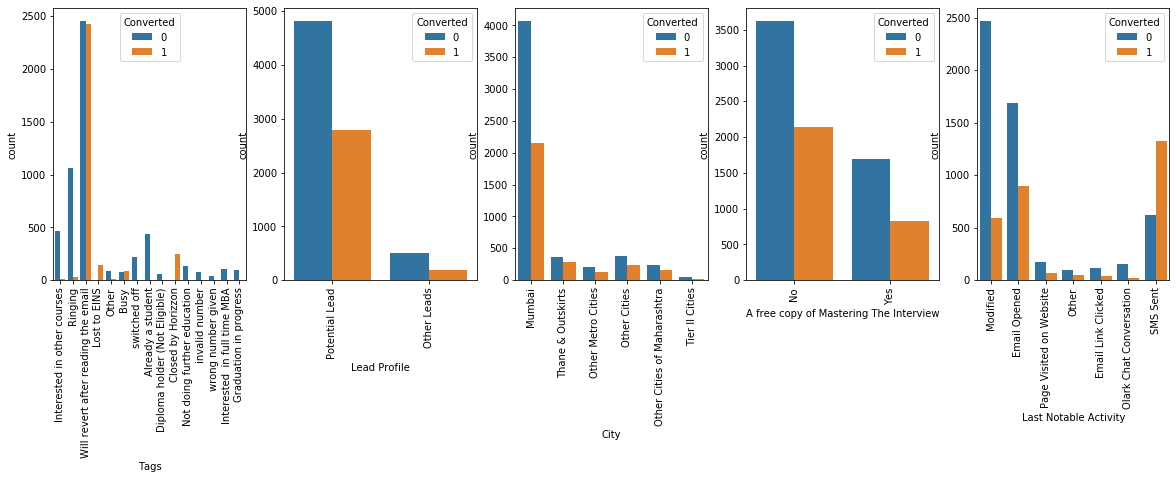

In [52]:
a=cat_col[16:21] 
plt.figure(figsize=(20,5))
for i,j in enumerate(a):
    plt.subplot(1,5,i+1)
    ax=sns.countplot(x =j, hue = "Converted", data = Leads_df)
    plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()    
   

 - Lead Profile: Potential Lead has more no of leads
 - City: Mumbai has more no of leads
 - A free copy of Mastering The Interview: Category No has more no of leads
 - Last Notable Activity: SMS Sent category has more no of leads.

In [53]:
# After univariate analysis these columns can be dropped 
var_to_drop=['Country','Digital Advertisement','Do Not Call','Through Recommendations','Newspaper','Newspaper Article','Search','X Education Forums']
Leads_df.drop(var_to_drop,axis=1,inplace=True)
Leads_df.shape

(8287, 18)

In [54]:
# The top 5 rows of the dataset
Leads_df.head()

Lead Number              Lead Origin     Lead Source Do Not Email  \
0       660737                      API      Olark Chat           No   
1       660728                      API  Organic Search           No   
2       660727  Landing Page Submission  Direct Traffic           No   
3       660719  Landing Page Submission  Direct Traffic           No   
4       660681  Landing Page Submission          Google           No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website                    Other   
1             Email Opened                    Other   
2             Email Opened  Business Administration   
3                    Other    Media and Advertising   
4        Converted to Lead                    Other   

  How did you hear about X Education What is your current occupation  \
0                      Online Search                      Unemployed   
1                      Online Search                      Unemployed   
2                      Online Search                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags    Lead Profile    City  \
0          Interested in other courses  Potential Lead  Mumbai   
1                              Ringing  Potential Lead  Mumbai   
2  Will revert after reading the email  Potential Lead  Mumbai   
3                              Ringing  Potential Lead  Mumbai   
4  Will revert after reading the email  Potential Lead  Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

####  Dummy Variable creation:

In [55]:
# 'Do Not Email' to map
var=['Do Not Email']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Leads_df['Do Not Email'] = Leads_df[var].apply(binary_map)

In [56]:
# Categorical column list after data cleaning and prep
cat_col=[]
for i in Leads_df.columns:
    if Leads_df[i].dtype=='object':
        cat_col.append(i)
print(cat_col)        

['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [57]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy= pd.get_dummies(Leads_df[cat_col], drop_first=True)

# Adding the results to the master dataframe
Leads_df = pd.concat([Leads_df, dummy], axis=1)

# Dropping the original columns from the dataset
Leads_df.drop(cat_col,axis=1,inplace=True)

# Top 5 rows after
Leads_df.head()

Lead Number  Do Not Email  Converted  TotalVisits  \
0       660737             0          0          0.0   
1       660728             0          0          5.0   
2       660727             0          1          2.0   
3       660719             0          0          1.0   
4       660681             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Other  Lead Source_Google  \
0                                    0                  0                   0   
1                                    0                  0                   0   
2                                    1                  0                   0   
3                                    1                  0                   0   
4                                    1                  0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  Lead Source_Other  \
0                       1                           0                  0   
1                       0                           1                  0   
2                       0                           0                  0   
3                       0                           0                  0   
4                       0                           0                  0   

   Lead Source_Reference  Last Activity_Email Bounced  \
0                      0                            0   
1                      0                            0   
2                      0                            0   
3                      0                            0   
4                      0                            0   

   Last Activity_Email Link Clicked  Last Activity_Email Opened  \
0                                 0                           0   
1                                 0                           1   
2                                 0                           1   
3                                 0                           0   
4                                 0                           0   

   Last Activity_Form Submitted on Website  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    1   
4                                      0                    0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  

In [58]:
# Info of the new dataset
Leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8287 entries, 0 to 9239
Data columns (total 78 columns):
Lead Number                                                 8287 non-null int64
Do Not Email                                                8287 non-null int64
Converted                                                   8287 non-null int64
TotalVisits                                                 8287 non-null float64
Total Time Spent on Website                                 8287 non-null int64
Page Views Per Visit                                        8287 non-null float64
Lead Origin_Landing Page Submission                         8287 non-null uint8
Lead Origin_Other                                           8287 non-null uint8
Lead Source_Google                                          8287 non-null uint8
Lead Source_Olark Chat                                      8287 non-null uint8
Lead Source_Organic Search                                  8287 non-null uint8
Lead Sour

### Test-Train Split

In [59]:
# Assigning all feature variable to X
X=Leads_df.drop('Converted',axis=1)
X.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
0       660737             0          0.0                            0   
1       660728             0          5.0                          674   
2       660727             0          2.0                         1532   
3       660719             0          1.0                          305   
4       660681             0          2.0                         1428   

   Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                   0.0                                    0   
1                   2.5                                    0   
2                   2.0                                    1   
3                   1.0                                    1   
4                   1.0                                    1   

   Lead Origin_Other  Lead Source_Google  Lead Source_Olark Chat  \
0                  0                   0                       1   
1                  0                   0                       0   
2                  0                   0                       0   
3                  0                   0                       0   
4                  0                   1                       0   

   Lead Source_Organic Search  Lead Source_Other  Lead Source_Reference  \
0                           0                  0                      0   
1                           1                  0                      0   
2                           0                  0                      0   
3                           0                  0                      0   
4                           0                  0                      0   

   Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
0                            0                                 0   
1                            0                                 0   
2                            0                                 0   
3                            0                                 0   
4                            0                                 0   

   Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        0   
4                           0                                        0   

   Last Activity_Olark Chat Conversation  Last Activity_Other  \
0                                      0                    0   
1                                      0                    0   
2                                      0                    0   
3                                      0                    1   
4                                      0                    0   

   Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
0                                      1                       0   
1                                      0                       0   
2                                      0                       0   
3                                      0                       0   
4                                      0                       0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                        

In [60]:
# Assigning Response variable to y
y=Leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [61]:
# Splitting into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling the data

In [62]:
# Using standard scaler
scaler = StandardScaler()

# Since all the categorical variables are changed to dummies and are 1's and 0's we need to scale only numerical variables
var=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[var] = scaler.fit_transform(X_train[var])

X_train.head()

Lead Number  Do Not Email  TotalVisits  Total Time Spent on Website  \
3417       627526             0     0.463210                     0.094164   
17         660534             0     1.267708                     1.210690   
3189       629482             0    -0.341287                     0.632223   
7070       595392             0     0.060962                     0.249414   
255        657731             0    -0.743536                     1.036300   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
3417              0.937124                                    1   
17                1.974929                                    0   
3189             -0.100681                                    1   
7070              0.418221                                    1   
255              -0.619584                                    1   

      Lead Origin_Other  Lead Source_Google  Lead Source_Olark Chat  \
3417                  0                   0                       0   
17                    0                   0                       0   
3189                  0                   0                       0   
7070                  0                   0                       0   
255                   0                   0                       0   

      Lead Source_Organic Search  Lead Source_Other  Lead Source_Reference  \
3417                           0                  0                      0   
17                             0                  1                      0   
3189                           0                  0                      0   
7070                           0                  0                      0   
255                            0                  0                      0   

      Last Activity_Email Bounced  Last Activity_Email Link Clicked  \
3417                            0                                 0   
17                              0                                 1   
3189                            0                                 0   
7070                            0                                 0   
255                             0                                 0   

      Last Activity_Email Opened  Last Activity_Form Submitted on Website  \
3417                           0                                        0   
17                             0                                        0   
3189                           0                                        0   
7070                           0                                        0   
255                            0                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other  \
3417                                      0                    0   
17                                        0                    0   
3189                                      0                    0   
7070                                      0                    0   
255                                       0                    0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
3417                                      0                       1   
17                                        0                       0   
3189                                      0                       1   
7070                                      0                       1   
255                                       0                       0   

      Specialization_Business Administration  Specialization_E-Business  \
3417                                       0                          0   
17                                         0                          0   
3189                                       0                          0   
7070                                       0                          0   
255                                        0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management 

In [63]:
# Percentage of Conversion rate
(sum(Leads_df['Converted'])/len(Leads_df['Converted'].index))*100

35.923735972004344

35.9% of convertion is there

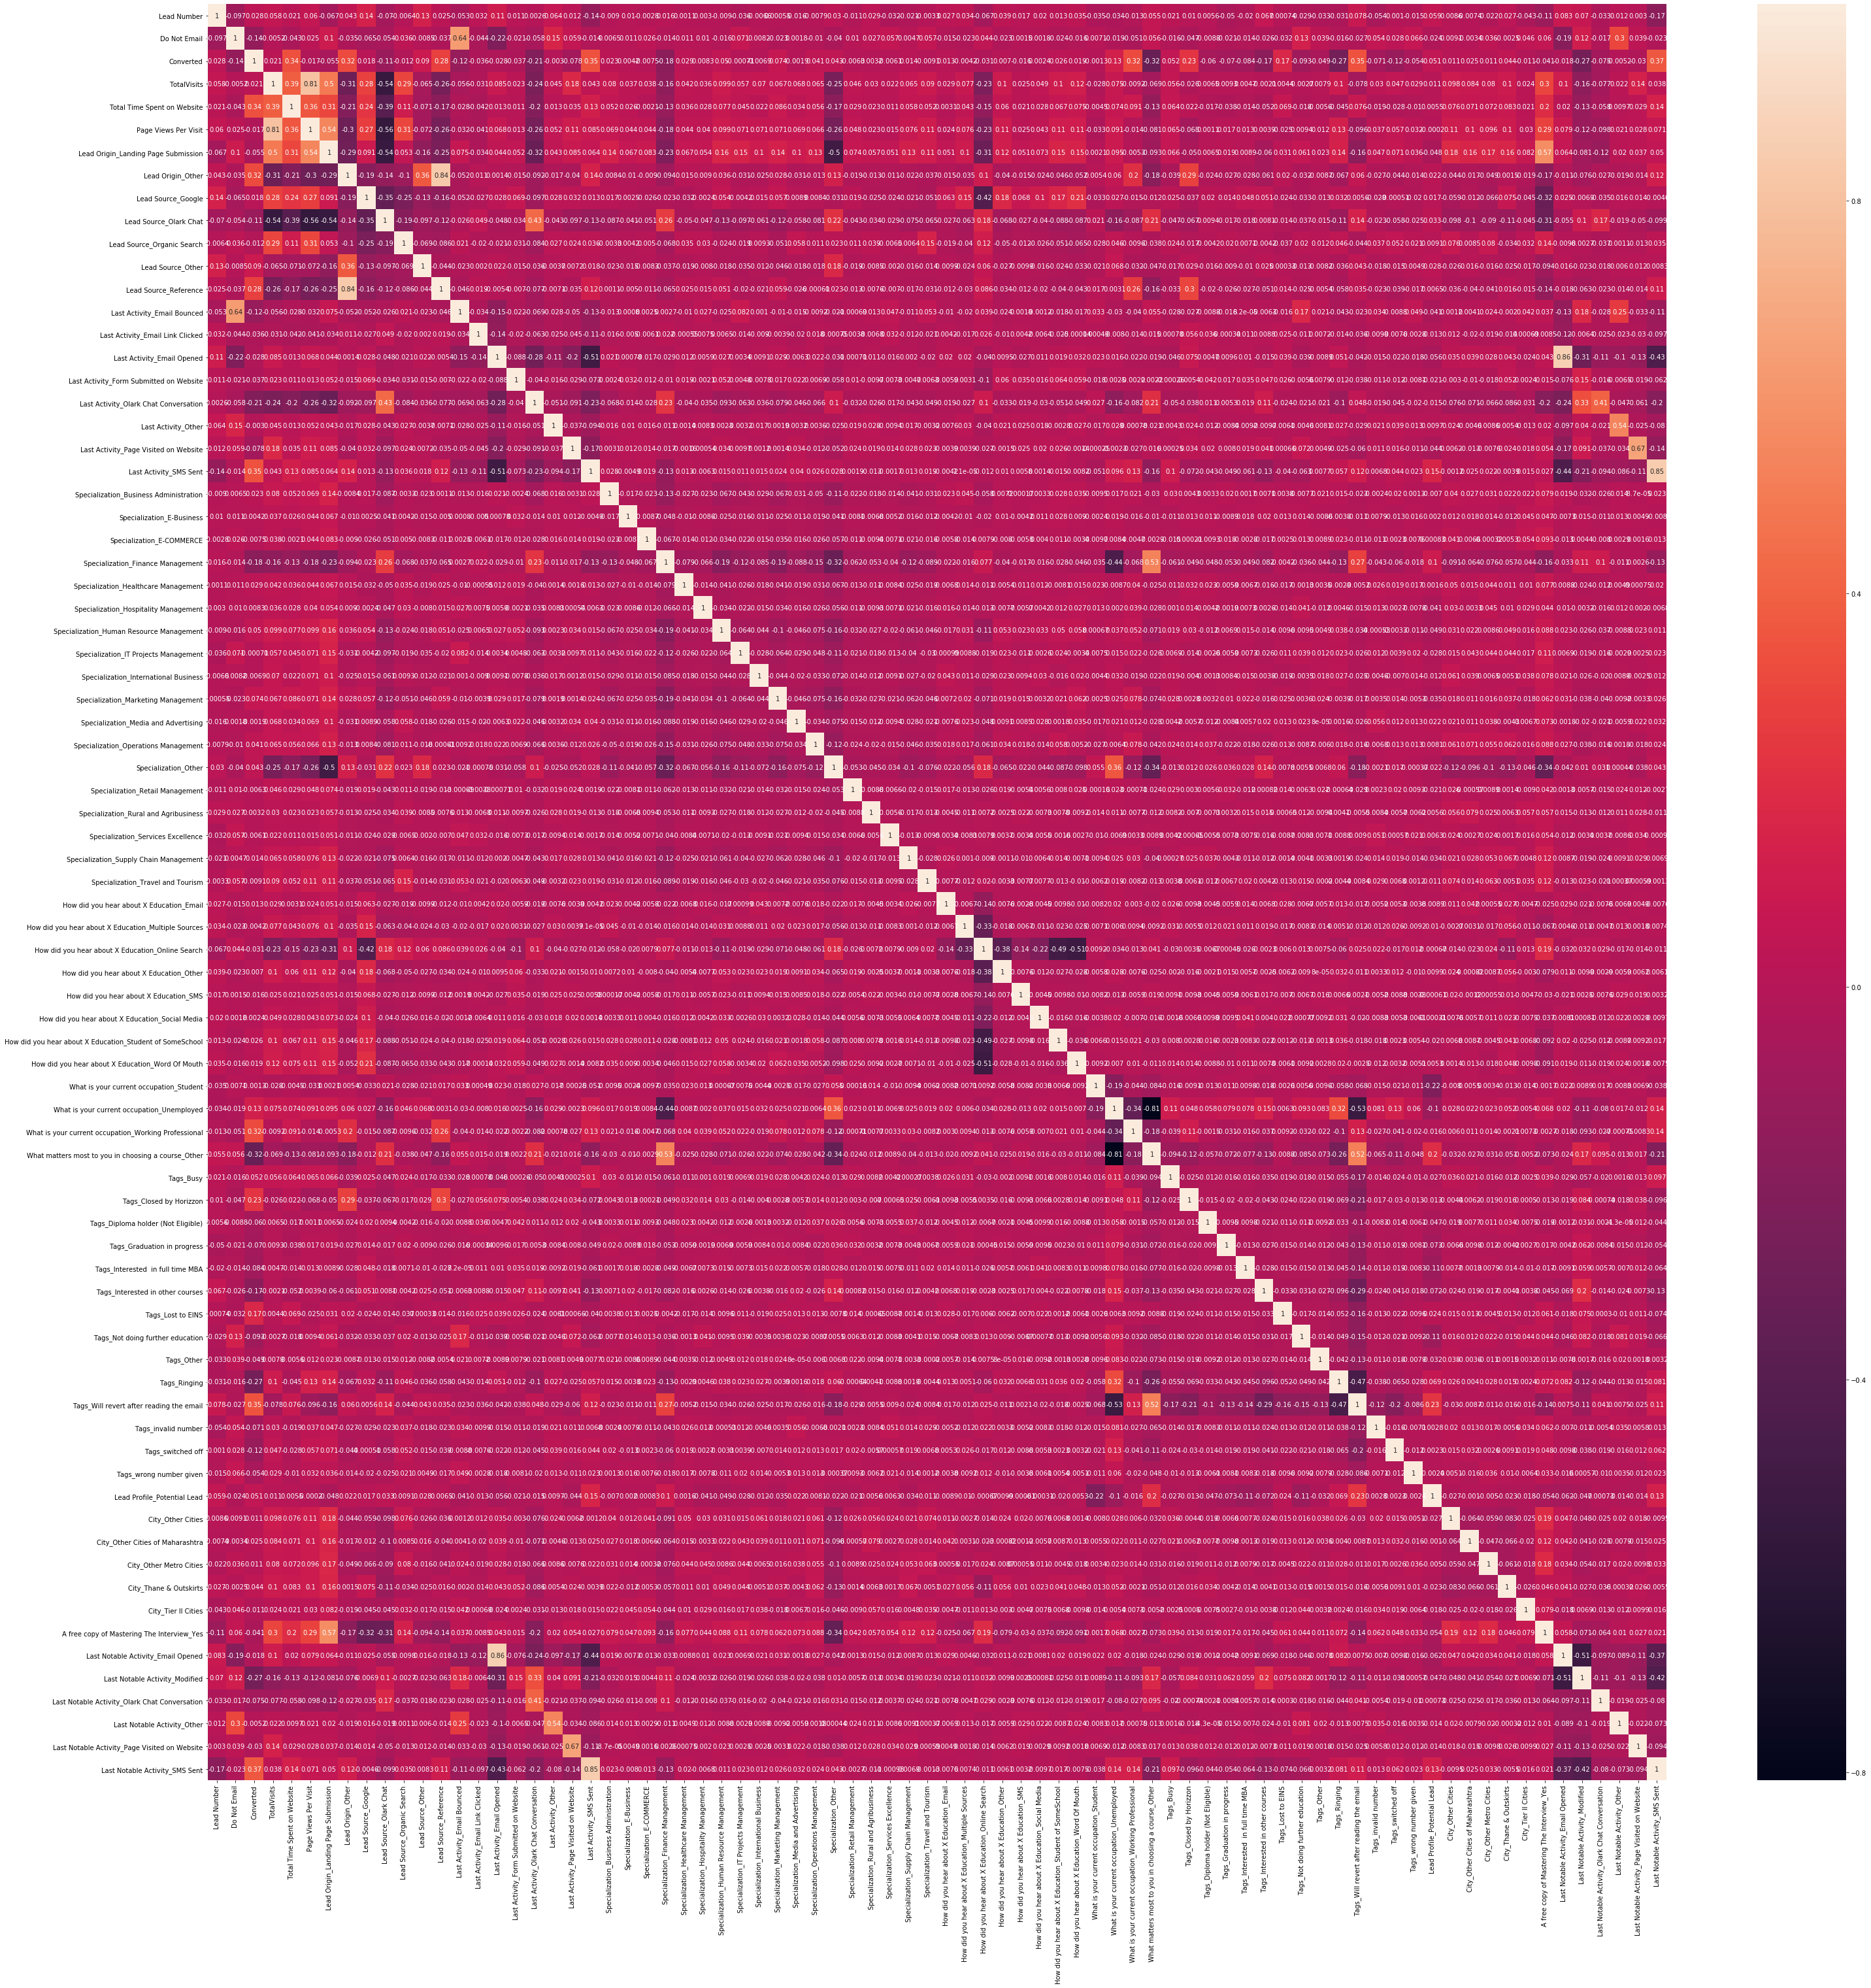

In [64]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(Leads_df.corr(),annot = True)
plt.show()

- Last Notable activity SMS sent and Last activity sms sent are highly correlated
- Last Notable Activity email opened and last activity email opened are highly correlated
- Lead source refence and lead origin other are highly correlated
- Total Visits and Page view per visits are highly corelated...


In [65]:
# Dropping highly corelated variables..
X_train = X_train.drop(['Page Views Per Visit','Lead Number','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Lead Source_Reference'],1)
X_test = X_test.drop(['Page Views Per Visit','Lead Number','Last Notable Activity_Email Opened','Last Notable Activity_SMS Sent','Lead Source_Reference'], 1)

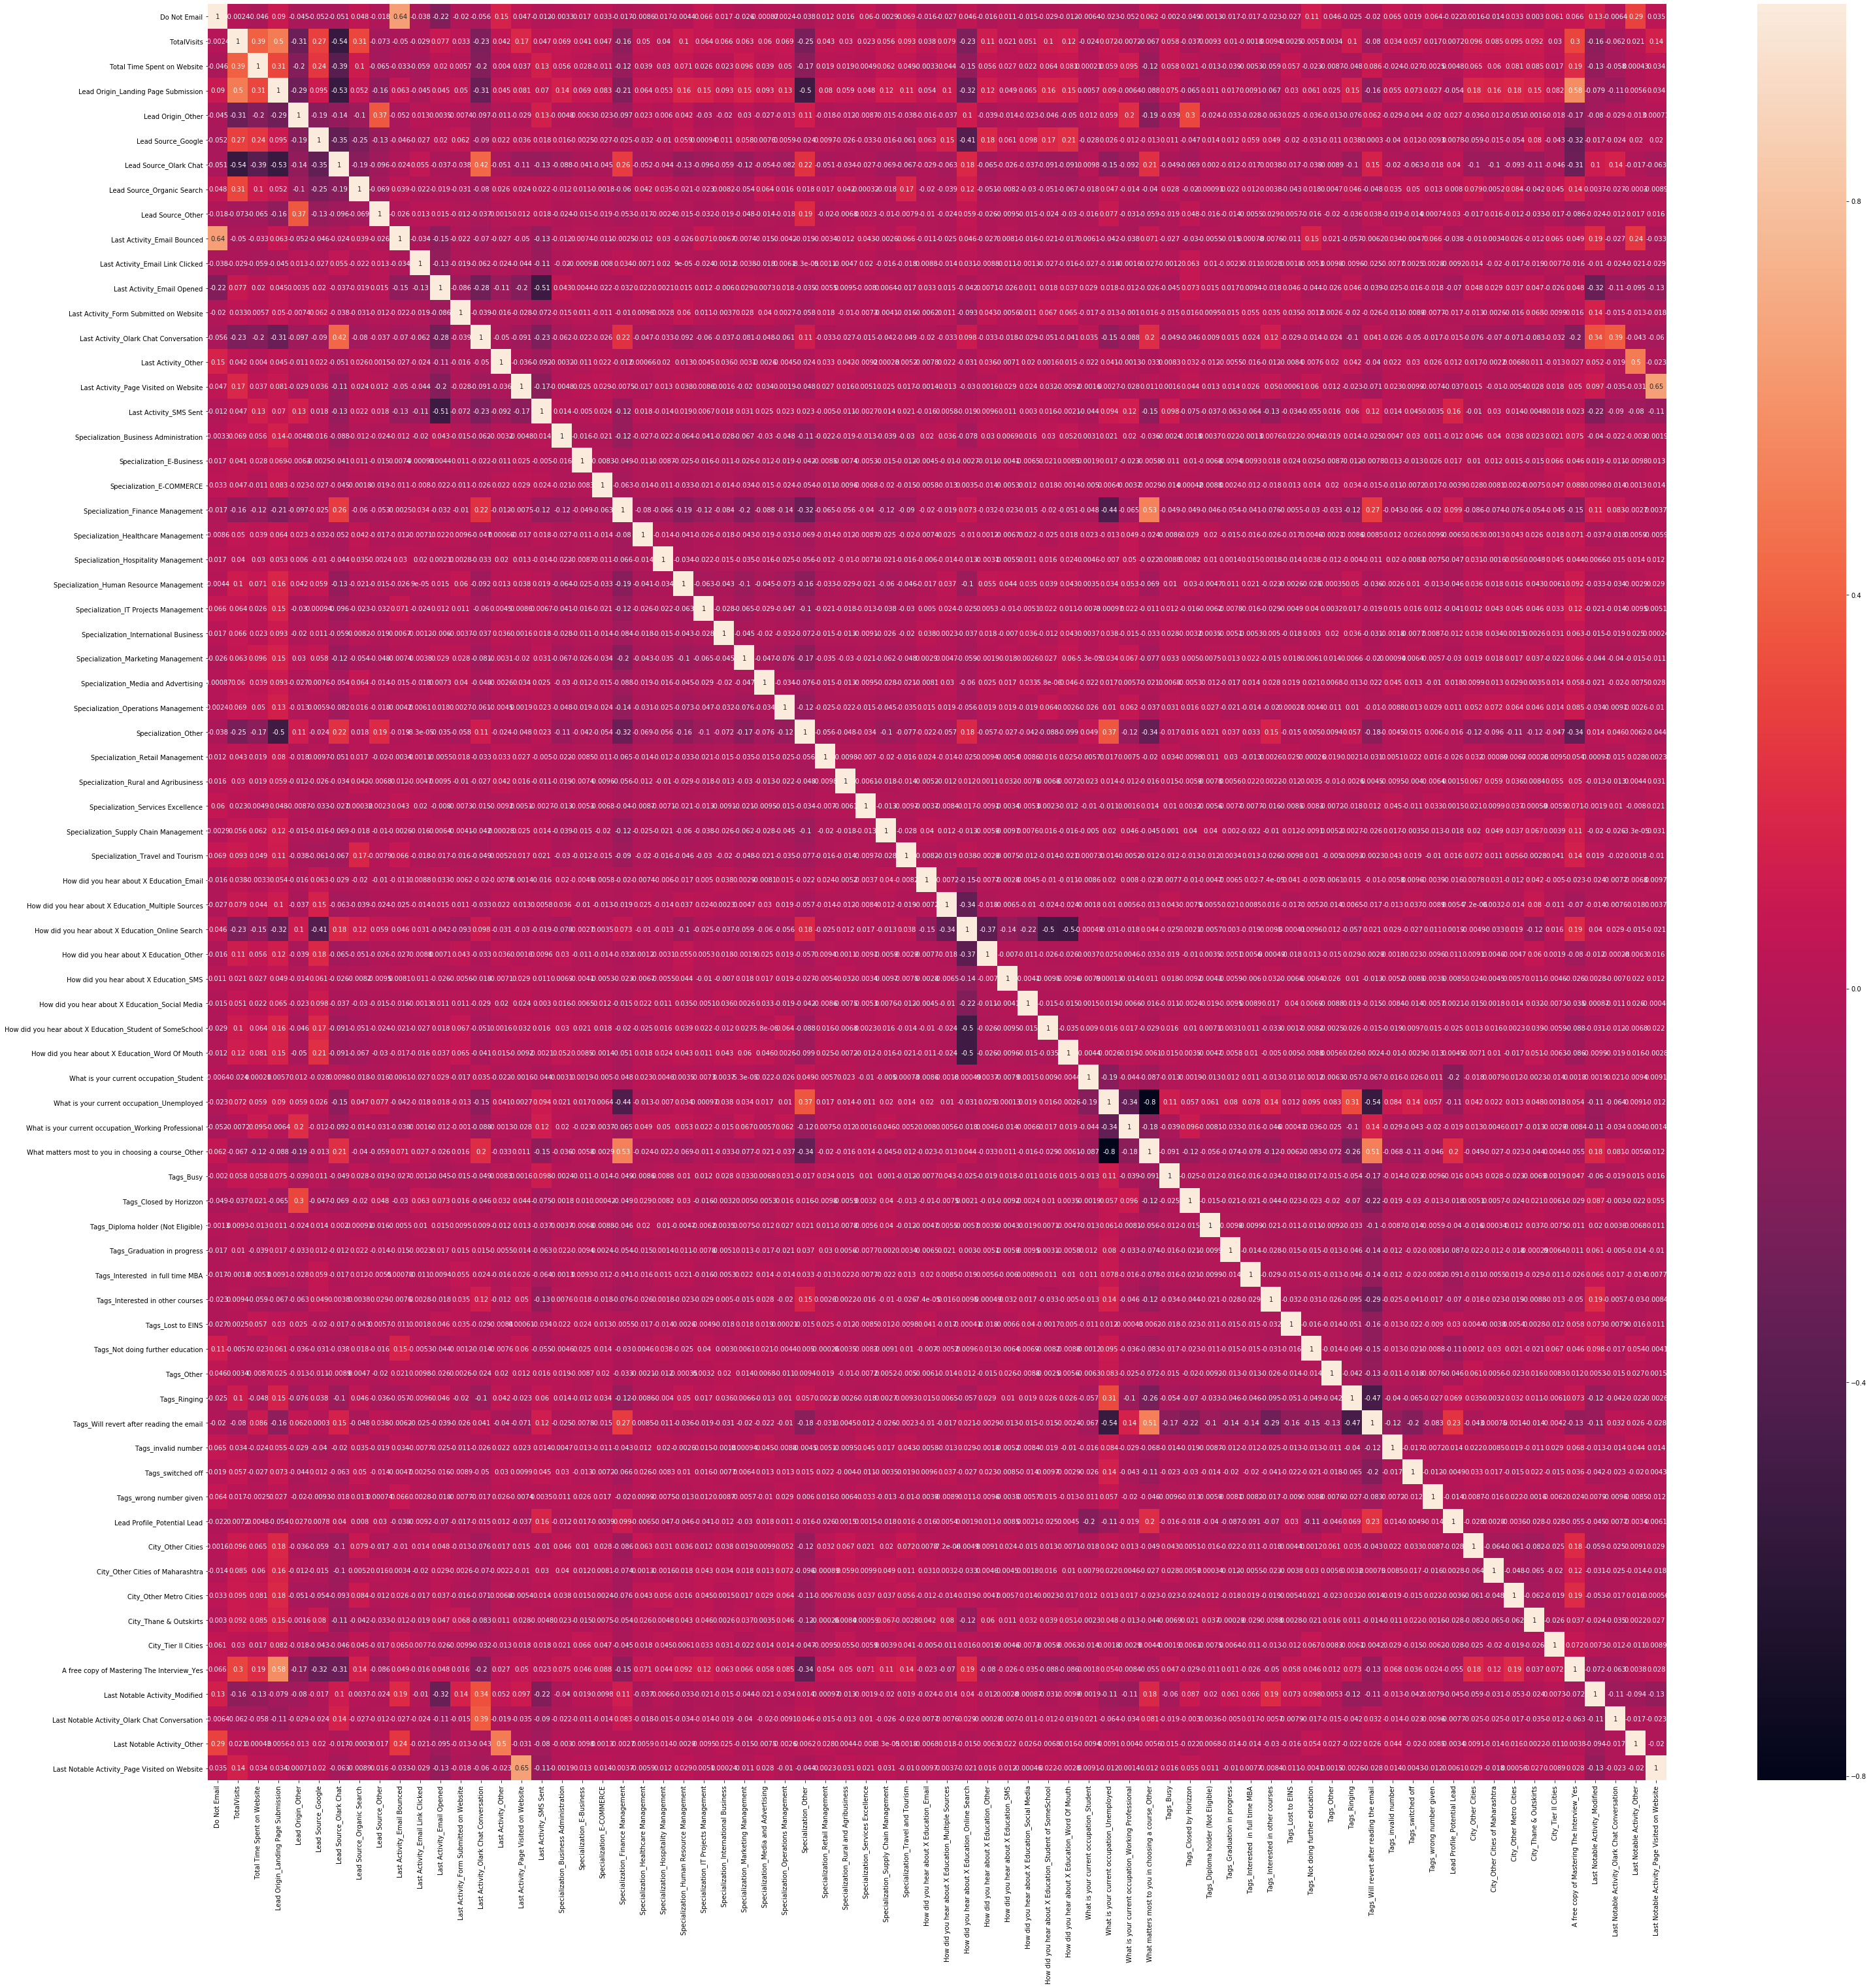

In [66]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,50))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Model building

In [67]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5800
Model:                            GLM   Df Residuals:                     5727
Model Family:                Binomial   Df Model:                           72
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -935.30
Date:                Mon, 02 Mar 2020   Deviance:                       1870.6
Time:                        18:46:13   Pearson chi2:                 2.27e+04
No. Iterations:                    25                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -2.5160      1.294     -1.944      0.052      -5.052       0.020
Do Not Email                                                -1.0097      0.327     -3.092      0.002      -1.650      -0.370
TotalVisits                                                  0.1979      0.090      2.193      0.028       0.021       0.375
Total Time Spent on Website                                  1.0459      0.072     14.460      0.000       0.904       1.188
Lead Origin_Landing Page Submission                         -0.4066      0.236     -1.720      0.085      -0.870       0.057
Lead Origin_Other                                            2.0198      0.449      4.499      0.000       1.140       2.900
Lead Source_Google                                          -0.2264      0.213     -1.062      0.288      -0.644       0.191
Lead Source_Olark Chat                                       1.0986      0.286      3.836      0.000       0.537       1.660
Lead Source_Organic Search                                  -0.0192      0.245     -0.078      0.937      -0.499       0.461
Lead Source_Other                                            0.1252      0.408      0.307      0.759      -0.674       0.925
Last Activity_Email Bounced                                 -0.7758      0.706     -1.098      0.272      -2.160       0.609
Last Activity_Email Link Clicked                            -0.5158      0.509     -1.014      0.311      -1.513       0.481
Last Activity_Email Opened                                  -0.1058      0.376     -0.281      0.779      -0.844       0.632
Last Activity_Form Submitted on Website                     -1.0616      0.771     -1.377      0.169      -2.573       0.450
Last Activity_Olark Chat Conversation                       -0.9007      0.436     -2.066      0.039      -1.755      -0.046
Last Activity_Other                                          1.0074      0.717      1.405      0.160      -0.398       2.413
Last Activity_Page Visited on Website                        0.0468      0.541      0.086      0.931      -1.014       1.108
Last Activity_SMS Sent                                       2.2896      0.372      6.160      0.000       1.561       3.018
Specialization_Business Administration                      -0.2776      0.459     -0.606      0.545      -1.176       0.621
Specialization_E-Business                                   -0.6148      0.771     -0.797      0.425      -2.127       0.897
Specialization_E-COMMERCE                                   -0.8109      0.782     -1.037      0.300      -2.344       0.722
Specialization_Finance Management                           -0.4738      0.371     

### Feature selection using RFE

In [68]:
# Assigning logreg
logreg = LogisticRegression()

# Selecting RFE for 15 variables as output
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [69]:
# To understand the supporting variables
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True, False,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False,  True,  True, False, False])

In [70]:
# Ranking the columns according to the RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 6),
 ('Lead Origin_Landing Page Submission', False, 25),
 ('Lead Origin_Other', False, 2),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 50),
 ('Lead Source_Other', False, 45),
 ('Last Activity_Email Bounced', False, 12),
 ('Last Activity_Email Link Clicked', False, 20),
 ('Last Activity_Email Opened', False, 47),
 ('Last Activity_Form Submitted on Website', False, 22),
 ('Last Activity_Olark Chat Conversation', False, 10),
 ('Last Activity_Other', False, 7),
 ('Last Activity_Page Visited on Website', False, 46),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 52),
 ('Specialization_E-Business', False, 48),
 ('Specialization_E-COMMERCE', False, 32),
 ('Specialization_Finance Management', False, 31),
 ('Specialization_Healthcare Management', False, 51),
 ('Specialization_Hospitality M

In [71]:
# Assigning RFE supported variables to col variable
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [72]:
# Dropping columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Other',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       '

#### Assessing the model with Stats model 

Model: 2

In [73]:
# Adding constant to the model
X_train_sm = sm.add_constant(X_train[col])

# Applying the model
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5800
Model:                            GLM   Df Residuals:                     5784
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1120.3
Date:                Mon, 02 Mar 2020   Deviance:                       2240.6
Time:                        18:46:17   Pearson chi2:                 1.31e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.2260      0.215    -14.990      0.000      -3.648      -2.804
Do Not Email                                            -1.3825      0.251     -5.507      0.000      -1.875      -0.890
Last Activity_SMS Sent                                   2.5131      0.136     18.474      0.000       2.246       2.780
What is your current occupation_Working Professional     1.5565      0.329      4.730      0.000       0.911       2.202
What matters most to you in choosing a course_Other     -4.2252      0.141    -29.907      0.000      -4.502      -3.948
Tags_Busy                                                2.0929      0.313      6.688      0.000       1.480       2.706
Tags_Closed by Horizzon                                 29.6288    1.5e+04      0.002      0.998   -2.94e+04    2.94e+04
Tags_Lost to EINS                                       10.3855      0.644     16.137      0.000       9.124      11.647
Tags_Not doing further education                       -21.6692   2.03e+04     -0.001      0.999   -3.99e+04    3.98e+04
Tags_Ringing                                            -1.8269      0.320     -5.709      0.000      -2.454      -1.200
Tags_Will revert after reading the email                 5.1728      0.229     22.611      0.000       4.724       5.621
Tags_invalid number                                     -2.2164      1.047     -2.117      0.034      -4.269      -0.164
Tags_switched off                                       -2.6497      0.751     -3.527      0.000      -4.122      -1.177
Tags_wrong number given                                -23.1168    3.5e+04     -0.001      0.999   -6.86e+04    6.86e+04
Last Notable Activity_Modified                          -1.6047      0.127    -12.676      0.000      -1.853      -1.357
Last Notable Activity_Olark Chat Conversation           -1.9951      0.472     -4.227      0.000      -2.920      -1.070
========================================================================================================================
"""

In [74]:
col = col.drop('Tags_Not doing further education', 1)
col

Index(['Do Not Email', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Model: 3

In [75]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5800
Model:                            GLM   Df Residuals:                     5785
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1122.3
Date:                Mon, 02 Mar 2020   Deviance:                       2244.7
Time:                        18:46:17   Pearson chi2:                 1.32e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3054      0.215    -15.385      0.000      -3.727      -2.884
Do Not Email                                            -1.3903      0.250     -5.555      0.000      -1.881      -0.900
Last Activity_SMS Sent                                   2.5086      0.136     18.474      0.000       2.242       2.775
What is your current occupation_Working Professional     1.5686      0.331      4.736      0.000       0.919       2.218
What matters most to you in choosing a course_Other     -4.2235      0.141    -29.911      0.000      -4.500      -3.947
Tags_Busy                                                2.1769      0.312      6.978      0.000       1.566       2.788
Tags_Closed by Horizzon                                 29.7119    1.5e+04      0.002      0.998   -2.94e+04    2.94e+04
Tags_Lost to EINS                                       10.4688      0.644     16.266      0.000       9.207      11.730
Tags_Ringing                                            -1.7433      0.319     -5.464      0.000      -2.369      -1.118
Tags_Will revert after reading the email                 5.2546      0.228     23.038      0.000       4.808       5.702
Tags_invalid number                                     -2.1322      1.047     -2.037      0.042      -4.184      -0.081
Tags_switched off                                       -2.5656      0.751     -3.417      0.001      -4.037      -1.094
Tags_wrong number given                                -23.0318    3.5e+04     -0.001      0.999   -6.86e+04    6.86e+04
Last Notable Activity_Modified                          -1.6100      0.127    -12.726      0.000      -1.858      -1.362
Last Notable Activity_Olark Chat Conversation           -1.9958      0.472     -4.225      0.000      -2.922      -1.070
========================================================================================================================
"""

In [76]:
col = col.drop('Tags_wrong number given', 1)
col

Index(['Do Not Email', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Model: 4

In [77]:
# Adding constant to the model
X_train_sm = sm.add_constant(X_train[col])

# Applying the model
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5800
Model:                            GLM   Df Residuals:                     5786
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1124.8
Date:                Mon, 02 Mar 2020   Deviance:                       2249.7
Time:                        18:46:17   Pearson chi2:                 1.30e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3929      0.216    -15.739      0.000      -3.815      -2.970
Do Not Email                                            -1.4000      0.249     -5.623      0.000      -1.888      -0.912
Last Activity_SMS Sent                                   2.4901      0.135     18.430      0.000       2.225       2.755
What is your current occupation_Working Professional     1.5792      0.333      4.739      0.000       0.926       2.232
What matters most to you in choosing a course_Other     -4.2144      0.141    -29.953      0.000      -4.490      -3.939
Tags_Busy                                                2.2757      0.311      7.323      0.000       1.667       2.885
Tags_Closed by Horizzon                                 29.7914    1.5e+04      0.002      0.998   -2.94e+04    2.94e+04
Tags_Lost to EINS                                       10.5422      0.644     16.363      0.000       9.279      11.805
Tags_Ringing                                            -1.6401      0.318     -5.164      0.000      -2.263      -1.018
Tags_Will revert after reading the email                 5.3400      0.229     23.327      0.000       4.891       5.789
Tags_invalid number                                     -2.0280      1.046     -1.938      0.053      -4.079       0.023
Tags_switched off                                       -2.4614      0.750     -3.281      0.001      -3.932      -0.991
Last Notable Activity_Modified                          -1.6002      0.126    -12.652      0.000      -1.848      -1.352
Last Notable Activity_Olark Chat Conversation           -1.9931      0.473     -4.217      0.000      -2.919      -1.067
========================================================================================================================
"""

In [78]:
col = col.drop('Tags_Closed by Horizzon', 1)
col

Index(['Do Not Email', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other', 'Tags_Busy',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Model: 5

In [79]:
# Adding constant to the model
X_train_sm = sm.add_constant(X_train[col])

# Applying the model
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5800
Model:                            GLM   Df Residuals:                     5787
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1552.9
Date:                Mon, 02 Mar 2020   Deviance:                       3105.8
Time:                        18:46:17   Pearson chi2:                 9.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2805      0.101    -12.724      0.000      -1.478      -1.083
Do Not Email                                            -1.6045      0.220     -7.298      0.000      -2.035      -1.174
Last Activity_SMS Sent                                   2.1141      0.114     18.474      0.000       1.890       2.338
What is your current occupation_Working Professional     2.3194      0.251      9.241      0.000       1.827       2.811
What matters most to you in choosing a course_Other     -4.0091      0.128    -31.217      0.000      -4.261      -3.757
Tags_Busy                                                0.3428      0.245      1.401      0.161      -0.137       0.822
Tags_Lost to EINS                                        7.8978      0.598     13.213      0.000       6.726       9.069
Tags_Ringing                                            -3.4718      0.261    -13.296      0.000      -3.984      -2.960
Tags_Will revert after reading the email                 3.0632      0.124     24.725      0.000       2.820       3.306
Tags_invalid number                                     -3.8229      1.029     -3.717      0.000      -5.839      -1.807
Tags_switched off                                       -4.2644      0.727     -5.863      0.000      -5.690      -2.839
Last Notable Activity_Modified                          -1.1041      0.101    -10.917      0.000      -1.302      -0.906
Last Notable Activity_Olark Chat Conversation           -1.5336      0.404     -3.794      0.000      -2.326      -0.741
========================================================================================================================
"""

In [80]:
col = col.drop('Tags_Busy', 1)
col

Index(['Do Not Email', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Other',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

Model: 6

In [81]:
# Adding constant to the model
X_train_sm = sm.add_constant(X_train[col])

# Applying the model
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5800
Model:                            GLM   Df Residuals:                     5788
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1553.9
Date:                Mon, 02 Mar 2020   Deviance:                       3107.7
Time:                        18:46:18   Pearson chi2:                 1.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2353      0.095    -13.061      0.000      -1.421      -1.050
Do Not Email                                            -1.6016      0.220     -7.278      0.000      -2.033      -1.170
Last Activity_SMS Sent                                   2.1521      0.112     19.293      0.000       1.933       2.371
What is your current occupation_Working Professional     2.2962      0.250      9.171      0.000       1.805       2.787
What matters most to you in choosing a course_Other     -4.0233      0.129    -31.279      0.000      -4.275      -3.771
Tags_Lost to EINS                                        7.8786      0.598     13.172      0.000       6.706       9.051
Tags_Ringing                                            -3.5462      0.256    -13.867      0.000      -4.047      -3.045
Tags_Will revert after reading the email                 3.0203      0.120     25.251      0.000       2.786       3.255
Tags_invalid number                                     -3.9000      1.027     -3.796      0.000      -5.914      -1.887
Tags_switched off                                       -4.3406      0.725     -5.984      0.000      -5.762      -2.919
Last Notable Activity_Modified                          -1.1240      0.100    -11.237      0.000      -1.320      -0.928
Last Notable Activity_Olark Chat Conversation           -1.5430      0.403     -3.824      0.000      -2.334      -0.752
========================================================================================================================
"""

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3417    0.980869
17      0.086335
3189    0.478463
7070    0.980869
255     0.996008
7199    0.086335
7815    0.033495
7282    0.008314
2029    0.856318
1769    0.229670
dtype: float64

In [83]:
# Reshapping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.98086937, 0.08633461, 0.47846319, 0.98086937, 0.99600775,
       0.08633461, 0.03349502, 0.00831378, 0.85631769, 0.22966958])

##### Creating a dataframe with the actual converted and the predicted probabilities

In [84]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  LeadID
0          1        0.980869    3417
1          0        0.086335      17
2          0        0.478463    3189
3          1        0.980869    7070
4          1        0.996008     255

##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [85]:
# Mapping the values
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  LeadID  Predicted
0          1        0.980869    3417          1
1          0        0.086335      17          0
2          0        0.478463    3189          0
3          1        0.980869    7070          1
4          1        0.996008     255          1

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3492  201]
 [ 415 1692]]


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8937931034482759


#### Checking VIFs

In [88]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6            Tags_Will revert after reading the email  3.09
3   What matters most to you in choosing a course_...  2.42
1                              Last Activity_SMS Sent  1.57
9                      Last Notable Activity_Modified  1.41
2   What is your current occupation_Working Profes...  1.21
5                                        Tags_Ringing  1.12
0                                        Do Not Email  1.11
4                                   Tags_Lost to EINS  1.04
8                                   Tags_switched off  1.03
10      Last Notable Activity_Olark Chat Conversation  1.03
7                                 Tags_invalid number  1.02

All features are in the specified range.

#### Metrics beyond simply accuracy

In [89]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [90]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8030374940673944

In [91]:
# Let us calculate specificity
TN / float(TN+FP)

0.9455727051177905

In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8937803941643204


#### Plotting the ROC Curve

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

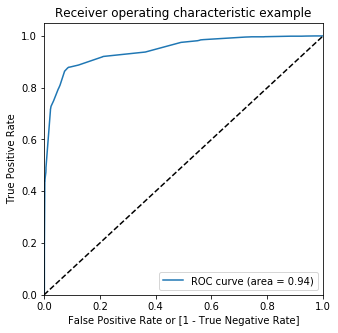

In [94]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The area under the curve is 0.94

####  Finding Optimal Cutoff Point

In [95]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.980869    3417          1    1    1    1    1    1    1   
1          0        0.086335      17          0    1    0    0    0    0    0   
2          0        0.478463    3189          0    1    1    1    1    1    0   
3          1        0.980869    7070          1    1    1    1    1    1    1   
4          1        0.996008     255          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  
0    1    1    1    1  
1    0    0    0    0  
2    0    0    0    0  
3    1    1    1    1  
4    1    1    1    1

In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sens','Speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Prob  Accuracy      Sens     Speci
0.0   0.0  0.363276  1.000000  0.000000
0.1   0.1  0.836207  0.920740  0.787977
0.2   0.2  0.837759  0.918842  0.791497
0.3   0.3  0.900172  0.878975  0.912266
0.4   0.4  0.901034  0.876602  0.914974
0.5   0.5  0.893793  0.803037  0.945573
0.6   0.6  0.893103  0.794495  0.949364
0.7   0.7  0.887241  0.749407  0.965881
0.8   0.8  0.882414  0.716184  0.977254
0.9   0.9  0.811552  0.493118  0.993230


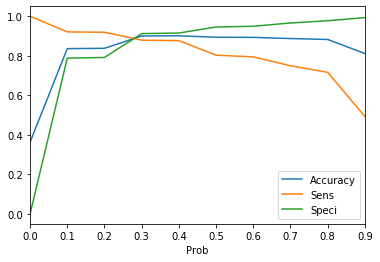

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Prob', y=['Accuracy','Sens','Speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [98]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  LeadID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0          1        0.980869    3417          1    1    1    1    1    1    1   
1          0        0.086335      17          0    1    0    0    0    0    0   
2          0        0.478463    3189          0    1    1    1    1    1    0   
3          1        0.980869    7070          1    1    1    1    1    1    1   
4          1        0.996008     255          1    1    1    1    1    1    1   

   0.6  0.7  0.8  0.9  Final_Predicted  
0    1    1    1    1                1  
1    0    0    0    0                0  
2    0    0    0    0                1  
3    1    1    1    1                1  
4    1    1    1    1                1

In [99]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.9001724137931034

In [100]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[3369,  324],
       [ 255, 1852]], dtype=int64)

In [101]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [102]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8789748457522544

In [103]:
# Let us calculate specificity
TN / float(TN+FP)

0.9122664500406173

In [104]:
# Calculate false postive rate - # Calculate false postive rate - predicting lead when person is not converted
print(FP/ float(TN+FP))

0.08773354995938261


In [105]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8511029411764706


In [106]:
# Negative predictive value
print (TN / float(TN+ FN))

0.929635761589404


#### Precision and Recall

In [107]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
confusion

array([[3369,  324],
       [ 255, 1852]], dtype=int64)

##### Precision
TP / TP + FP

In [108]:
# Calculating Precision
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8511029411764706

In [109]:
# Calculating Precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8511029411764706

##### Recall
TP / TP + FN

In [110]:
# Calculating Recall
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8789748457522544

In [111]:
# Calculating recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8789748457522544

#### Precision and recall tradeoff

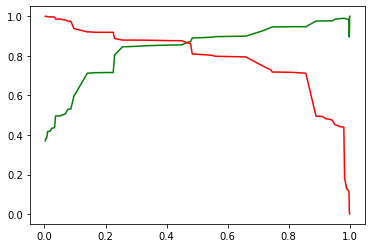

In [112]:
# Plotting graph of precision and recall
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [113]:
# Finding columns of the y_train
y_train_pred_final.columns

Index([      'Converted',  'Converted_Prob',          'LeadID',
             'Predicted',               0.0,               0.1,
                     0.2,               0.3,               0.4,
                     0.5,               0.6,               0.7,
                     0.8,               0.9, 'Final_Predicted'],
      dtype='object')

In [114]:
# Dropping unnecessary columns
y_train_pred_final.drop(['Predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1,inplace=True)
y_train_pred_final.head()

Converted  Converted_Prob  LeadID  Final_Predicted
0          1        0.980869    3417                1
1          0        0.086335      17                0
2          0        0.478463    3189                1
3          1        0.980869    7070                1
4          1        0.996008     255                1

### Making predictions on the test set

#### Scaling Test data

In [115]:
# Since all the categorical variables are changed to dummies and are 1's and 0's we need to scale only numerical variables
var=['TotalVisits','Total Time Spent on Website']
X_test[var] = scaler.fit_transform(X_test[var])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
2473             1     2.496037                     1.845708   
5541             0    -0.365005                     1.658703   
8697             0     1.678597                    -0.020139   
4771             0    -1.182446                    -0.877420   
7597             1    -1.182446                    -0.877420   

      Lead Origin_Landing Page Submission  Lead Origin_Other  \
2473                                    1                  0   
5541                                    1                  0   
8697                                    1                  0   
4771                                    0                  1   
7597                                    0                  0   

      Lead Source_Google  Lead Source_Olark Chat  Lead Source_Organic Search  \
2473                   0                       0                           0   
5541                   0                       0                           0   
8697                   0                       0                           0   
4771                   0                       0                           0   
7597                   0                       1                           0   

      Lead Source_Other  Last Activity_Email Bounced  \
2473                  0                            0   
5541                  0                            0   
8697                  0                            0   
4771                  0                            0   
7597                  0                            0   

      Last Activity_Email Link Clicked  Last Activity_Email Opened  \
2473                                 0                           0   
5541                                 0                           0   
8697                                 0                           0   
4771                                 0                           0   
7597                                 0                           0   

      Last Activity_Form Submitted on Website  \
2473                                        0   
5541                                        0   
8697                                        0   
4771                                        0   
7597                                        0   

      Last Activity_Olark Chat Conversation  Last Activity_Other  \
2473                                      0                    0   
5541                                      0                    0   
8697                                      0                    0   
4771                                      0                    0   
7597                                      1                    0   

      Last Activity_Page Visited on Website  Last Activity_SMS Sent  \
2473                                      0                       1   
5541                                      0                       1   
8697                                      0                       1   
4771                                      0                       1   
7597                                      0                       0   

      Specialization_Business Administration  Specialization_E-Business  \
2473                                       0                          0   
5541                                       0                          0   
8697                                       1                          0   
4771                                       0                          0   
7597                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
2473                          0                                  0   
5541                          0                                  0   
8697                          0                                  0   
4771                          0                                  0   
7597                          0                                  

In [116]:
X_test = X_test[col]
X_test.head()

Do Not Email  Last Activity_SMS Sent  \
2473             1                       1   
5541             0                       1   
8697             0                       1   
4771             0                       1   
7597             1                       0   

      What is your current occupation_Working Professional  \
2473                                                  1      
5541                                                  1      
8697                                                  0      
4771                                                  1      
7597                                                  0      

      What matters most to you in choosing a course_Other  Tags_Lost to EINS  \
2473                                                  0                    0   
5541                                                  0                    0   
8697                                                  0                    0   
4771                                                  0                    0   
7597                                                  1                    0   

      Tags_Ringing  Tags_Will revert after reading the email  \
2473             0                                         1   
5541             0                                         1   
8697             1                                         0   
4771             0                                         1   
7597             0                                         1   

      Tags_invalid number  Tags_switched off  Last Notable Activity_Modified  \
2473                    0                  0                               0   
5541                    0                  0                               0   
8697                    0                  0                               0   
4771                    0                  0                               0   
7597                    0                  0                               1   

      Last Notable Activity_Olark Chat Conversation  
2473                                              0  
5541                                              0  
8697                                              0  
4771                                              0  
7597                                              0

In [117]:
# Adding constant to the test data set
X_test_sm = sm.add_constant(X_test)
# Making predictions on the test data set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

2473    0.990356
5541    0.998041
8697    0.067271
4771    0.998041
7597    0.006938
5838    0.086335
4266    0.478463
1289    0.856318
302     0.096362
5984    0.005851
dtype: float64

In [118]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

# Let's see the head
y_test_pred.head()

0
2473  0.990356
5541  0.998041
8697  0.067271
4771  0.998041
7597  0.006938

In [119]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['LeadID'] = y_test_df.index

In [120]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Appending y_test_df and y_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

# Let's see the head
y_test_pred_final.head()

Converted  LeadID         0
0          1    2473  0.990356
1          1    5541  0.998041
2          0    8697  0.067271
3          1    4771  0.998041
4          0    7597  0.006938

In [122]:
# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex_axis(['LeadID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_test_pred_final
y_test_pred_final.head()

LeadID  Converted  Converted_Prob
0    2473          1        0.990356
1    5541          1        0.998041
2    8697          0        0.067271
3    4771          1        0.998041
4    7597          0        0.006938

In [123]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_test_pred_final[i]= y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_test_pred_final.head()

LeadID  Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0    2473          1        0.990356    1    1    1    1    1    1    1    1   
1    5541          1        0.998041    1    1    1    1    1    1    1    1   
2    8697          0        0.067271    1    0    0    0    0    0    0    0   
3    4771          1        0.998041    1    1    1    1    1    1    1    1   
4    7597          0        0.006938    1    0    0    0    0    0    0    0   

   0.8  0.9  
0    1    1  
1    1    1  
2    0    0  
3    1    1  
4    0    0

In [124]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Prob','Accuracy','Sens','Speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Prob  Accuracy      Sens     Speci
0.0   0.0  0.349819  1.000000  0.000000
0.1   0.1  0.823482  0.916092  0.773655
0.2   0.2  0.825090  0.914943  0.776747
0.3   0.3  0.886208  0.866667  0.896722
0.4   0.4  0.887415  0.863218  0.900433
0.5   0.5  0.885002  0.793103  0.934447
0.6   0.6  0.887012  0.788506  0.940012
0.7   0.7  0.879775  0.744828  0.952381
0.8   0.8  0.880177  0.713793  0.969697
0.9   0.9  0.816647  0.490805  0.991960


In [125]:
# Mapping the predictions to the column Final Predicted
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head of y_pred_final
y_test_pred_final.head()

LeadID  Converted  Converted_Prob  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
0    2473          1        0.990356    1    1    1    1    1    1    1    1   
1    5541          1        0.998041    1    1    1    1    1    1    1    1   
2    8697          0        0.067271    1    0    0    0    0    0    0    0   
3    4771          1        0.998041    1    1    1    1    1    1    1    1   
4    7597          0        0.006938    1    0    0    0    0    0    0    0   

   0.8  0.9  Final_Predicted  
0    1    1                1  
1    1    1                1  
2    0    0                0  
3    1    1                1  
4    0    0                0

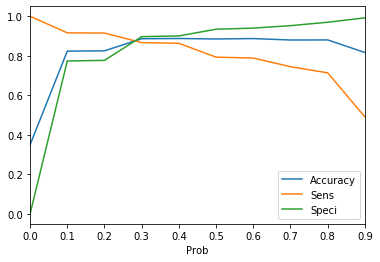

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Prob', y=['Accuracy','Sens','Speci'])
plt.show()

In [127]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.8862082830719743

In [128]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)
confusion2

array([[1450,  167],
       [ 116,  754]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8666666666666667

In [131]:
# Let us calculate specificity
TN / float(TN+FP)

0.8967223252937538

In [132]:
# Calculate false postive rate - # Calculate false postive rate - predicting lead when person is not converted
print(FP/ float(TN+FP))

0.10327767470624613


In [133]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8186753528773073


In [134]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9259259259259259


#### Precision and Recall

##### Precision
TP / TP + FP

In [135]:
# Calculating Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.8186753528773073

In [136]:
# Calculating Precision score
precision_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.8186753528773073

##### Recall
TP / TP + FN

In [137]:
# Calculating Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8666666666666667

In [138]:
# Calculating recall score
recall_score(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted)

0.8666666666666667

#### Precision and recall tradeoff

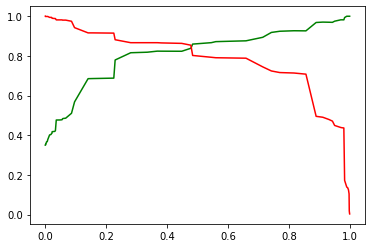

In [139]:
# Plotting graph of precision and recall
p, r, thresholds = precision_recall_curve(y_test_pred_final.Converted, y_test_pred_final.Converted_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [140]:
# Shape
y_test_pred_final.shape

(2487, 14)

In [141]:
# columns of y_test_pred_final
y_test_pred_final.columns

Index([         'LeadID',       'Converted',  'Converted_Prob',
                     0.0,               0.1,               0.2,
                     0.3,               0.4,               0.5,
                     0.6,               0.7,               0.8,
                     0.9, 'Final_Predicted'],
      dtype='object')

In [142]:
# Dropping unnecessary columns
y_test_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1,inplace=True)

In [143]:
y_test_pred_final.head()

LeadID  Converted  Converted_Prob  Final_Predicted
0    2473          1        0.990356                1
1    5541          1        0.998041                1
2    8697          0        0.067271                0
3    4771          1        0.998041                1
4    7597          0        0.006938                0

### Concatenating test and train data set

In [144]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
Leads_df_pred = y_train_pred_final.append(y_test_pred_final)
Leads_df_pred.head()

Converted  Converted_Prob  Final_Predicted  LeadID
0          1        0.980869                1    3417
1          0        0.086335                0      17
2          0        0.478463                1    3189
3          1        0.980869                1    7070
4          1        0.996008                1     255

In [145]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(Leads_df_pred['LeadID'].unique().tolist())

8287

In [146]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
Leads_df_pred['Lead_Score'] = Leads_df_pred['Converted_Prob'].apply(lambda x : round(x*100))
Leads_df_pred.head()

Converted  Converted_Prob  Final_Predicted  LeadID  Lead_Score
0          1        0.980869                1    3417          98
1          0        0.086335                0      17           9
2          0        0.478463                1    3189          48
3          1        0.980869                1    7070          98
4          1        0.996008                1     255         100

In [147]:
# Making the LeadID column as index
# We willlater join it with the original_leads dataframe based on index
Leads_df_pred = Leads_df_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
Leads_df_pred.head(20)

Converted  Converted_Prob  Final_Predicted  Lead_Score
LeadID                                                        
0               0        0.086335                0           9
1               0        0.008314                0           1
2               1        0.856318                1          86
3               0        0.002717                0           0
4               1        0.659498                1          66
5               0        0.033495                0           3
7               0        0.033495                0           3
8               0        0.096362                0          10
9               0        0.096362                0          10
10              1        0.856318                1          86
11              1        0.998699                1         100
13              0        0.008314                0           1
14              0        0.545740                1          55
15              1        0.856318                1          86
16              0        0.033495                0           3
17              0        0.086335                0           9
19              0        0.086335                0           9
20              0        0.086335                0           9
21              0        0.086335                0           9
22              1        0.659498                1          66

In [148]:
# Adding Lead Number column to the data frame...
Leads_df_pred['Lead Number'] = Leads_df['Lead Number']

In [149]:
Leads_df_pred.sort_values(['Converted_Prob','Lead_Score'],ascending=False).head(30)

Converted  Converted_Prob  Final_Predicted  Lead_Score  Lead Number
LeadID                                                                     
2764            1        0.999953                1         100       633120
3519            1        0.999953                1         100       626813
5784            1        0.999953                1         100       605335
5806            1        0.999953                1         100       605266
6586            1        0.999953                1         100       599270
3829            1        0.999869                1         100       623382
6579            1        0.999869                1         100       599326
8867            1        0.999869                1         100       582296
3192            1        0.999597                1         100       629451
3288            1        0.999597                1         100       628500
7853            1        0.999597                1         100       589544
8117            1        0.999597                1         100       587883
746             0        0.999534                1         100       652708
2127            1        0.999534                1         100       639297
2354            1        0.999534                1         100       637070
2475            1        0.999534                1         100       635910
2725            1        0.999534                1         100       633515
3006            1        0.999534                1         100       630972
3185            1        0.999534                1         100       629511
3751            1        0.999534                1         100       624227
3790            1        0.999534                1         100       623770
4312            1        0.999534                1         100       618435
4693            1        0.999534                1         100       614791
4830            1        0.999534                1         100       613668
5860            1        0.999534                1         100       604984
6900            1        0.999534                1         100       596654
3851            1        0.999387                1         100       623167
11              1        0.998699                1         100       660570
75              1        0.998699                1         100       659779
298             1        0.998699                1         100       657261

#### Determing the Feature Importance

In [150]:
# List of all features present in the final model
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.60
Last Activity_SMS Sent                                  2.15
What is your current occupation_Working Professional    2.30
What matters most to you in choosing a course_Other    -4.02
Tags_Lost to EINS                                       7.88
Tags_Ringing                                           -3.55
Tags_Will revert after reading the email                3.02
Tags_invalid number                                    -3.90
Tags_switched off                                      -4.34
Last Notable Activity_Modified                         -1.12
Last Notable Activity_Olark Chat Conversation          -1.54
dtype: float64

Relative coeffecient of the features

In [151]:
# Relative coefficients of the features
feature_imp = new_params
feature_imp = 100.0 * (feature_imp / feature_imp.max())
feature_imp

Do Not Email                                           -20.33
Last Activity_SMS Sent                                  27.32
What is your current occupation_Working Professional    29.14
What matters most to you in choosing a course_Other    -51.07
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -45.01
Tags_Will revert after reading the email                38.34
Tags_invalid number                                    -49.50
Tags_switched off                                      -55.09
Last Notable Activity_Modified                         -14.27
Last Notable Activity_Olark Chat Conversation          -19.58
dtype: float64

In [152]:
sorted_features= np.argsort(feature_imp,kind='quicksort',order='list of str')
sorted_features

Do Not Email                                             8
Last Activity_SMS Sent                                   3
What is your current occupation_Working Professional     7
What matters most to you in choosing a course_Other      5
Tags_Lost to EINS                                        0
Tags_Ringing                                            10
Tags_Will revert after reading the email                 9
Tags_invalid number                                      1
Tags_switched off                                        2
Last Notable Activity_Modified                           6
Last Notable Activity_Olark Chat Conversation            4
dtype: int64

Plot for the features based on their coefficients

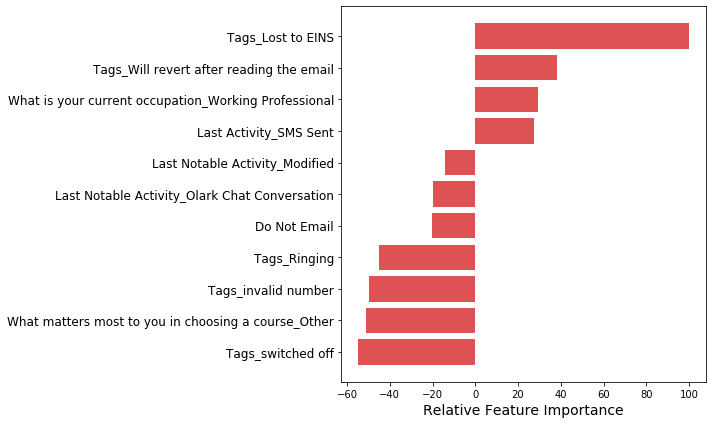

In [153]:
# Plotting the graph
pos = np.arange(sorted_features.shape[0]) + .5

features = plt.figure(figsize=(10,6))
ax = features.add_subplot(1, 1, 1)
ax.barh(pos, feature_imp[sorted_features], align='center', color = 'tab:red',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col].columns)[sorted_features], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

## Conclusion:

### Top three variables:
- Tags
- What is your current occupation
- Last Activity

### Train Set: At cut off 0.3

 - Accuracy: 90%
 - Sensitivity: 88%
 - Specificity: 91%
 - Precision: 85%
 - Recall: 88%
 - Negative Predictive value: 92%
 - Positive Predictive value: 85%
 - False Positive Rate: 8.7%
 

### Test Set: At cut off 0.3

 - Accuracy: 89%
 - Sensitivity: 87%
 - Specificity: 89%
 - Precision: 81%
 - Recall: 86%
 - Negative Predictive value: 92% 
 - Positive Predictive value: 81%
 - False Positive Rate: 10%